# Predicting FIFA Player Overall Ratings

## Introduction

Ultimate Team is a highly popular game mode in the FIFA video game -series produced by Electronic Arts. In Ultimate Team, players gather their teams from virtual player items based on real world players. In this analysis, we will explore the factors that contribute to players overall rating and build a predictive model to estimate these ratings.

### Objective

The primary objective of this project is to leverage machine learning techniques to predict the overall rating of FIFA players. By understanding the underlying features that influence players performance, we aim to create a model that can generalize well and provide accurate predictions.

### Dataset

We will be working with a comprehensive dataset that includes various attributes of FIFA players, such as their skills, physical attributes, and historical performance statistics. The dataset will serve as the foundation for our analysis and model training.

### Methodology

Our approach involves exploring the dataset, performing data preprocessing, and applying machine learning algorithms to develop a predictive model. We will evaluate the performance of the model  and fine-tune it to achieve the best possible accuracy in predicting player overall ratings.

### Outline

1. **Data Exploration:** Investigate the structure and content of the dataset to gain insights into the available features.

2. **Data Preprocessing:** Clean and prepare the data for analysis, addressing missing values, scaling features, and handling categorical variables.

3. **Feature Selection:** Identify the most relevant features that contribute to  players overall rating.

4. **Model Development:** Implement machine learning algorithms to build a predictive model.

5. **Model Evaluation:** Assess the models performance using appropriate metrics and fine-tune parameters for optimization.

6. **Conclusion:** Summarize findings, discuss limitations, and suggest potential areas for improvement.

Whether you are a football enthusiast, a data science enthusiast, or both, join us on this journey as we delve into the fascinating world of predicting FIFA player ratings!


## Data Source

The dataset used in this analysis was gathered from the website futbin.com. Futbin is a website that focuses on maintaining a database for all the player items in Ultimate Team and also their current prices as well as a daily price graph for all the items
throughout their existence. The current FIFA out now is FIFA 24 but for this notebook the players and prices for FIFA 23 were used, since that allowed for more data to be used and testing the performance of the predictions throughout the
whole year.
 The file is located in the same folder as this notebook.

### Dataset Overview

- **File Location:** [All_players_15_24.csv]
- **Number of Rows:** 180,021
- **Number of Columns:** 110

### Temporal Coverage

The dataset spans player information from the year 2015 to 2024. However, for the purposes of this analysis, we will focus solely on player data from the year 2024.

### File Details

To maintain consistency and relevance to recent player statistics, we have narrowed our focus to the most current data available. This decision ensures that our predictive model is based on the latest performance metrics and attributes.

Feel free to explore the complete dataset if you are interested in a broader historical perspective.



In [1748]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Web Scraping
from urllib.request import Request, urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

# Time
from datetime import date,datetime
from time import sleep

In [1749]:
#Settings 

pd.set_option('display.max_columns', None) # set no limit for number of displayed columns.

In [1750]:
all_players = pd.read_csv("All_players_15_24.csv", low_memory=False)
all_players

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 109
0,231747,/player/231747/kylian-mbappe/240002,24,2,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16,Ligue 1,1,LW,7,NaN,2018-07-01,2024,18,France,1335,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,NaN
1,239085,/player/239085/erling-haaland/240002,24,2,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13,Premier League,1,ST,9,NaN,2022-07-01,2027,36,Norway,1352,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,NaN
2,192985,/player/192985/kevin-de-bruyne/240002,24,2,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13,Premier League,1,SUB,17,NaN,2015-08-30,2025,7,Belgium,1325,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,NaN
3,158023,/player/158023/lionel-messi/240002,24,2,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39,Major League Soccer,1,RF,10,NaN,2023-07-16,2025,52,Argentina,1369,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3,NaN
4,165153,/player/165153/karim-

In [1751]:
players_2024 = all_players[all_players.fifa_version==24]

In [1752]:
players_2024

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 109
0,231747,/player/231747/kylian-mbappe/240002,24,2,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16,Ligue 1,1,LW,7,NaN,2018-07-01,2024,18,France,1335,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,NaN
1,239085,/player/239085/erling-haaland/240002,24,2,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13,Premier League,1,ST,9,NaN,2022-07-01,2027,36,Norway,1352,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,NaN
2,192985,/player/192985/kevin-de-bruyne/240002,24,2,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13,Premier League,1,SUB,17,NaN,2015-08-30,2025,7,Belgium,1325,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,NaN
3,158023,/player/158023/lionel-messi/240002,24,2,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39,Major League Soccer,1,RF,10,NaN,2023-07-16,2025,52,Argentina,1369,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3,NaN
4,165153,/player/165153/karim-

In [1753]:

csv_file_path = "Fifa24PLayers.csv"

# Export the DataFrame to CSV
players_2024.to_csv(csv_file_path,  index=False)

## Data Cleaning for the 2024 Dataset

Let's begin cleaning the 2024 dataset to ensure data quality and prepare it for analysis. Our steps include handling missing values, removing duplicates, selecting relevant features, converting data types, and addressing outliers.

- **Initial Dataset Size:** 180,021 rows × 110 columns

Let's streamline the dataset for a more focused analysis.


In [1754]:
players_2024 = pd.read_csv(csv_file_path, low_memory=False)
players_2024

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 109
0,231747,/player/231747/kylian-mbappe/240002,24,2,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,NaN
1,239085,/player/239085/erling-haaland/240002,24,2,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,NaN
2,192985,/player/192985/kevin-de-bruyne/240002,24,2,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,NaN
3,158023,/player/158023/lionel-messi/240002,24,2,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,4

In [1755]:
players_2024.head(30)

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,Unnamed: 109
0,231747,/player/231747/kylian-mbappe/240002,24,2,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,NaN
1,239085,/player/239085/erling-haaland/240002,24,2,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,NaN
2,192985,/player/192985/kevin-de-bruyne/240002,24,2,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,NaN
3,158023,/player/158023/lionel-messi/240002,24,2,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,4

In [1756]:
players_2024.shape

(18350, 110)

In [1757]:
for column in players_2024.columns:
    unique_values = players_2024[column].nunique()
    null_values = players_2024[column].isnull().sum()
    dtype = players_2024[column].dtype
    
    print(f"Column: {column}")
    print(f"Data Type: {dtype}")
    print(f"Unique Values: {unique_values}")
    print(f"Missing Values: {null_values}")
    print("------------------------")

Column: player_id
Data Type: int64
Unique Values: 18350
Missing Values: 0
------------------------
Column: player_url
Data Type: object
Unique Values: 18350
Missing Values: 0
------------------------
Column: fifa_version
Data Type: int64
Unique Values: 1
Missing Values: 0
------------------------
Column: fifa_update
Data Type: int64
Unique Values: 1
Missing Values: 0
------------------------
Column: update_as_of
Data Type: object
Unique Values: 1
Missing Values: 0
------------------------
Column: short_name
Data Type: object
Unique Values: 17444
Missing Values: 0
------------------------
Column: long_name
Data Type: object
Unique Values: 18329
Missing Values: 0
------------------------
Column: player_positions
Data Type: object
Unique Values: 711
Missing Values: 0
------------------------
Column: overall
Data Type: int64
Unique Values: 45
Missing Values: 0
------------------------
Column: potential
Data Type: int64
Unique Values: 47
Missing Values: 0
------------------------
Column: va

In [1758]:
print([ f"{column}" for column in players_2024.columns ])

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed'

## 1. Find Columns with Missing Values

We will start by identifying columns with missing values.

In [1759]:
cols_with_missing = players_2024.isna().sum()
cols_with_missing = cols_with_missing[cols_with_missing >0].sort_values(ascending=False)
cols_with_missing

Unnamed: 109                      18350
nation_team_id                    17570
nation_jersey_number              17570
nation_position                   17570
club_loaned_from                  17170
player_tags                       17098
goalkeeping_speed                 16305
player_traits                      9741
physic                             2045
defending                          2045
dribbling                          2045
passing                            2045
shooting                           2045
pace                               2045
release_clause_eur                 1280
club_joined_date                   1267
value_eur                           100
league_name                          87
club_team_id                         87
wage_eur                             87
club_name                            87
club_contract_valid_until_year       87
club_jersey_number                   87
club_position                        87
league_level                         87


## 2. Drop Columns with missing values 

Now, we will define a function called drop_cols that takes a list of column names as input and drops the specified columns from the DataFrame if they exist.

In [1760]:
def drop_cols(columns) : 
    to_drop = []
    for col in columns : 
        if col in players_2024.columns : 
            to_drop.append(col)
    if to_drop!=[]  :
        print(f" awww to drop is {to_drop}") 
        players_2024.drop(columns = to_drop, inplace=True)
            

## 3.  Apply the drop_cols Function
Let's apply the drop_cols function to drop columns with missing values.

In [1761]:
drop_cols(['fifa_version','fifa_update','update_as_of','player_url','player_id','nation_position',
                 'nation_team_id','nation_jersey_number','club_loaned_from','player_tags','Unnamed: 109'])

 awww to drop is ['fifa_version', 'fifa_update', 'update_as_of', 'player_url', 'player_id', 'nation_position', 'nation_team_id', 'nation_jersey_number', 'club_loaned_from', 'player_tags', 'Unnamed: 109']


In [1762]:
players_2024.head(10)

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,2018-07-01,2024.0,18,France,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,2022-07-01,2027.0,36,Norway,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,2015-08-30,2025.0,7,Belgium,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,2023-07-16,2025.0,52,Argentina,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,K. Benzema,Karim Benzema,"CF, ST",90,90,51000000.0,95000.0,35,1987-12-19,185,81,607.0,Al Ittihad,350.0,Pro League,1.0,RS,9.0,2023-07-01,2026.0,18,France,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,"Finesse Shot +, Dead Ball, Pinged Pass, Tiki T...",79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,NaN,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
5,R. Lewandowski,Robert Lewandowski,ST,90,90,58000000.0,340000.0,34,1988-08-21,185,81,241.0,FC Barcelona,53.0,La Liga,1.0,ST,9.0,2022-07-18,2026.0,

## Drop Columns with unique values 

The goal of this code is to extract unique values from the "player_traits" and then proceeds to drop the "player_traits" column from the DataFrame.


In [1763]:
player_traits_unique_values = [ item for item in players_2024["player_traits"].unique() ]
print(len(player_traits_unique_values))
drop_cols(["player_traits"])

1481
 awww to drop is ['player_traits']


In [1764]:
players_2024.head(5)

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,2018-07-01,2024.0,18,France,Right,4,5,5,High/Low,Unique,Yes,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,2022-07-01,2027.0,36,Norway,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,2015-08-30,2025.0,7,Belgium,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,2023-07-16,2025.0,52,Argentina,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,K. Benzema,Karim Benzema,"CF, ST",90,90,51000000.0,95000.0,35,1987-12-19,185,81,607.0,Al Ittihad,350.0,Pro League,1.0,RS,9.0,2023-07-01,2026.0,18,France,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,NaN,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [1765]:
players_2024.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_jersey_number,club_contract_valid_until_year,nationality_id,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,18350.000000,18350.000000,1.825000e+04,18263.000000,18350.000000,18350.000000,18350.000000,18263.000000,18263.000000,18263.000000,18263.000000,18263.000000,18350.000000,18350.000000,18350.000000,18350.000000,1.707000e+04,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,16305.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,2045.000000
mean,65.817057,71.088065,2.837585e+06,8723.388819,25.267139,181.698747,75.210354,48068.359196,312.663035,1.392433,21.515468,2024.885890,56.380163,2.941417,2.386594,1.088065,5.367958e+06,68.371788,52.582091,57.489850,62.839497,52.093468,64.901564,49.291499,46.294005,51.794441,59.059946,42.435749,55.951717,47.750518,42.736240,53.639346,58.632425,64.583052,64.753406,63.414332,61.670354,64.030027,57.626757,65.729155,62.863869,64.906267,46.634060,55.808174,46.908774,50.479128,54.246649,47.795804,57.976240,46.666975,48.532534,46.336240,16.329373,16.124578,16.035095,16.168392,16.423815,35.253790
std,6.817917,6.220982,7.562794e+06,18707.237605,4.757756,6.869995,6.985703,54320.582247,613.736055,0.759218,18.508540,1.304193,49.443798,0.680378,0.775725,0.364488,1.493074e+07,10.766770,13.900844,9.898202,9.448958,16.026187,9.922964,17.828376,19.729039,17.296979,14.326221,17.593028,18.774825,17.896451,16.891964,14.652211,16.651090,15.378635,15.150145,15.012188,8.927546,14.579914,13.016983,11.868633,16.359399,12.632410,19.391332,16.797121,20.698963,19.736859,13.470163,15.710041,12.137094,20.415339,21.046124,20.569969,17.572154,16.945031,16.699136,17.093683,17.880726,10.591029
min,47.000000,48.000000,1.000000e+04,500.000000,16.000000,156.000000,49.000000,1.000000,1.000000,1.000000,1.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,1.400000e+04,27.000000,19.000000,25.000000,28.000000,15.000000,32.000000,7.000000,3.000000,5.000000,10.000000,4.000000,4.000000,7.000000,5.000000,10.000000,9.000000,12.000000,15.000000,20.000000,30.000000,20.000000,20.000000,27.000000,15.000000,22.000000,4.000000,11.000000,4.000000,3.000000,10.000000,8.000000,13.000000,3.000000,8.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,62.000000,67.000000,4.750000e+05,1000.000000,21.000000,177.000000,70.000000,459.000000,20.000000,1.000000,9.000000,2024.000000,21.000000,3.000000,2.000000,1.000000,8.080000e+05,62.000000,42.000000,51.000000,57.000000,38.000000,58.000000,39.000000,31.000000,44.000000,54.000000,30.000000,51.000000,36.000000,31.000000,45.000000,55.000000,57.000000,58.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,57.000000,32.000000,45.000000,26.000000,40.000000,45.000000,38.000000,51.000000,29.000000,29.000000,26.00

## Checking for Missing Values



In [1766]:
cols_with_missing = players_2024.isna().sum()
cols_with_missing = cols_with_missing[cols_with_missing >0].sort_values(ascending=False)
cols_with_missing

goalkeeping_speed                 16305
physic                             2045
defending                          2045
dribbling                          2045
passing                            2045
shooting                           2045
pace                               2045
release_clause_eur                 1280
club_joined_date                   1267
value_eur                           100
wage_eur                             87
club_contract_valid_until_year       87
club_jersey_number                   87
club_position                        87
league_level                         87
league_name                          87
league_id                            87
club_name                            87
club_team_id                         87
dtype: int64

## Handling Pace Speed of Goalkeeper
Next, we address missing values in the 'goalkeeping_speed' column and explore its correlation with other attributes.

In [1767]:
#Handling Pace speed of goalkeeper
goal_speed=players_2024["goalkeeping_speed"]
goal_speed[goal_speed.notnull()]
corr_list = list(["overall","goalkeeping_speed","pace"])
goal_speed = players_2024["goalkeeping_speed"].min()
players_2024["goalkeeping_speed"].fillna(goal_speed,inplace=True)

In [1768]:
print()
players_2024[corr_list].corr()

,overall,goalkeeping_speed,pace
overall,1.000000,0.019844,0.175546
goalkeeping_speed,0.019844,1.000000,NaN
pace,0.175546,NaN,1.000000


## Exploring Data Types
Let's analyze the data types present in the dataset, categorizing columns into numeric and non-numeric types.

This part of the notebook explores and prints the unique data types in the dataset and provides the count of numeric columns.

In [1769]:
numeric_cols = [col for col in players_2024.columns if players_2024[col].dtype!="object" ]
non_numeric_cols = [ col for col in players_2024.columns if players_2024[col].dtype=="object"]
all_types = set([ players_2024[col].dtype for col in players_2024.columns])
print(all_types)
print(len(numeric_cols))


{dtype('int64'), dtype('float64'), dtype('O')}
58


In [1770]:
players_2024[numeric_cols].corr()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_jersey_number,club_contract_valid_until_year,nationality_id,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
overall,1.000000,0.653449,0.554267,0.603202,0.446990,0.031794,0.115840,-0.212035,-0.219552,-0.197487,-0.192985,0.185749,-0.181593,0.212418,0.337770,0.468871,0.542373,0.175546,0.479744,0.713350,0.658338,0.355699,0.531964,0.392406,0.340488,0.348980,0.533089,0.368171,0.377456,0.410461,0.375107,0.518120,0.461457,0.196656,0.208743,0.256502,0.873431,0.147572,0.556758,0.567304,0.385204,0.364934,0.397446,0.393872,0.316707,0.355022,0.523882,0.335422,0.688943,0.319530,0.274715,0.250298,-0.021942,-0.020588,-0.021096,-0.013936,-0.019466,0.019844
potential,0.653449,1.000000,0.514093,0.491471,-0.268569,0.021214,-0.021216,-0.286019,-0.284239,-0.203460,-0.003954,0.339097,-0.236537,0.163842,0.262911,0.352563,0.524076,0.236282,0.284991,0.449606,0.488079,0.163333,0.156480,0.241551,0.230591,0.196734,0.381564,0.225275,0.300615,0.262840,0.204873,0.343954,0.350055,0.211343,0.214881,0.201281,0.547307,0.124064,0.334024,0.261927,0.178399,0.079754,0.231605,0.188965,0.155237,0.230075,0.349356,0.197945,0.416738,0.157595,0.158181,0.146748,-0.044705,-0.046060,-0.045536,-0.043676,-0.042579,-0.034097
value_eur,0.554267,0.514093,1.000000,0.831595,0.033758,0.006797,0.018364,-0.170097,-0.113023,-0.129085,-0.058797,0.233206,-0.070984,0.147201,0.232511,0.657368,0.995202,0.181038,0.284427,0.401927,0.401312,0.152307,0.217736,0.224509,0.218739,0.168514,0.305003,0.230831,0.239865,0.246178,0.208095,0.292398,0.272390,0.157055,0.163833,0.168851,0.495463,0.118546,0.300843,0.244191,0.197421,0.131279,0.228596,0.186180,0.144913,0.222500,0.328170,0.188081,0.380804,0.144658,0.131226,0.113199,-0.029394,-0.028768,-0.026314,-0.027479,-0.026479,-0.013900
wage_eur,0.603202,0.491471,0.831595,1.000000,0.141307,0.029693,0.047349,-0.223627,-0.162480,-0.133756,-0.074096,0.204206,-0.079925,0.161793,0.236738,0.670349,0.836658,0.139493,0.303072,0.443131,0.423853,0.196546,0.262226,0.251975,0.223447,0.205158,0.332480,0.249423,0.252446,0.274004,0.231180,0.324288,0.291916,0.135669,0.145009,0.161144,0.545776,0.106692,0.343881,0.286792,0.202813,0.170188,0.248250,0.230198,0.179960,0.235000,0.353598,0.207652,0.434227,0.180306,0.161847,0.141360,-0.026028,-0.024372,-0.021720,-0.023506,-0.023088,-0.002315
age,0.446990,-0.268569,0.033758,0.141307,1.000000,0.060866,0.215263,0.076185,0.054315,-0.056022,-0.208926,-0.212085,0.041276,0.059063,0.049747,0.214593,0.014721,-0.195685,0.236127,0.334561,0.188230,0.259968,0.450031,0.126696,0.085601,0.159249,0.154407,0.142031,0.029229,0.142255,0.182433,0.197811,0.089636,-0.129623,-0.120962,-0.016048,0.417140,-0.038612,0.274575,0.343856,0.152705,0.355328,0.159407,0.233907,0.182042,0.093250,0.200204,0.148049,0.345373,0.178002,0.117021,0.103200,0.101820,0.106274,0.104401,0.112577,0.102128,0.141201
height_cm,0.031794,0.021214,0.006797,0.029693,0.060866,1.000000,0.764608,-0.121531,-0.098197,0.062206,-0.023430,0.035628,-0.138537,-0.156282,-0.447333,0.029988,0.007611,-0.392834,-0.208242,-0.278232,-0.376774,0.187114,0.496964,-0.506414,-0.389303,0.002857,-0.342567,-0.357033,-0.486091,-0.461045,-0.434535,-0.319651,-0.408382

In [1771]:
# Handling Non Numerical Columns 
print(non_numeric_cols)
print(players_2024.columns)

['short_name', 'long_name', 'player_positions', 'dob', 'club_name', 'league_name', 'club_position', 'club_joined_date', 'nationality_name', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
Index(['short_name', 'long_name', 'player_positions', 'overall', 'potential',
       'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg',
       'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'nationality_name',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'a

## Removing Equivalent Columns

In our dataset, there are three pairs of equivalent attributes: (nationality_name, nationality_id), (club_team_id, club_name), and (league_id, league_name).

### Attribute Pairs:
1. **Nationality:** (nationality_name, nationality_id)
2. **Club Team:** (club_team_id, club_name)
3. **League:** (league_id, league_name)

We will remove the non-numerical attributes from each pair since the IDs represent nominal attributes. Additionally, we will exclude the "Date of Birth" attribute, opting for the "Age" attribute as a more representative numerical value.



In [1772]:
Equivalent_cols = ["nationality_name","club_name","league_name"]
Equivalent_cols.extend(["dob","long_name"])
drop_cols(Equivalent_cols)

 awww to drop is ['nationality_name', 'club_name', 'league_name', 'dob', 'long_name']


In [1773]:
players_2024.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,2018-07-01,2024.0,18,Right,4,5,5,High/Low,Unique,Yes,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,2022-07-01,2027.0,36,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2015-08-30,2025.0,7,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,2023-07-16,2025.0,52,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,2023-07-01,2026.0,18,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


## Transforming Club Joining Date and Contract Validity

We will transform the "Club Joined" date into the number of days from joining until 2023-22-09. Additionally, the "Contract Valid Until Year" will be mapped to the number of years until the contract's validity.



In [1774]:
def calculate_days(past_date) :
    past_date = datetime.strptime(past_date,"%Y-%m-%d")
    post_date = datetime.strptime("2023-09-22","%Y-%m-%d")
    difference = (post_date - past_date).days
    return difference
calculate_days("2018-05-25")
players_2024["club_joined_date"].unique().dtype

dtype('O')

In [1775]:
players_2024['club_joined_date'] = players_2024['club_joined_date'].apply(lambda x: calculate_days(x) if pd.notna(x) else x)
players_2024['club_joined_date'].dtype

dtype('float64')

In [1776]:
median = players_2024["club_joined_date"].median()
players_2024['club_joined_date'].fillna(median,inplace=True)

In [1777]:
players_2024.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,1909.0,2024.0,18,Right,4,5,5,High/Low,Unique,Yes,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2945.0,2025.0,7,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,68.0,2025.0,52,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,83.0,2026.0,18,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88+2,88+2,88+2,86,89,89,89,86,88+2,88+2,88+2,86+3,82+3,82+3,82+3,86+3,64+3,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [1778]:
def clean_pos_string(string) : 
    if string[1]=="+" or string[1]=="-" : 
        return int(string[0])
    pos = int(string[0:2])
    
    return pos
clean_pos_string("28+")

28

In [1779]:
overall_diff_pos = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
for pos in overall_diff_pos : 
    missing = players_2024[pos].isna().sum()
    print(f" missing from {pos} are : {missing}")
    players_2024[pos] = players_2024[pos].apply(lambda x : clean_pos_string(x))
    

 missing from ls are : 0
 missing from st are : 0
 missing from rs are : 0
 missing from lw are : 0
 missing from lf are : 0
 missing from cf are : 0
 missing from rf are : 0
 missing from rw are : 0
 missing from lam are : 0
 missing from cam are : 0
 missing from ram are : 0
 missing from lm are : 0
 missing from lcm are : 0
 missing from cm are : 0
 missing from rcm are : 0
 missing from rm are : 0
 missing from lwb are : 0
 missing from ldm are : 0
 missing from cdm are : 0
 missing from rdm are : 0
 missing from rwb are : 0
 missing from lb are : 0
 missing from lcb are : 0
 missing from cb are : 0
 missing from rcb are : 0
 missing from rb are : 0
 missing from gk are : 0


In [1780]:
players_2024.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,1909.0,2024.0,18,Right,4,5,5,High/Low,Unique,Yes,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2945.0,2025.0,7,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,68.0,2025.0,52,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,83.0,2026.0,18,Right,4,4,5,Medium/Medium,Normal (170-185),Yes,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18


In [1781]:
# Real face attribute has no meaning
drop_cols(["real_face"])

 awww to drop is ['real_face']


# Encoding Body Types

In this section, we explore the unique values present in the 'body_type' column and apply a mapping to convert them into numerical representations.

In [1782]:
players_2024["body_type"].unique()

mapping = {
    'Stocky (170-)': 0,
    'Normal (170-)': 1,
    'Lean (170-)': 2,
    'Normal (170-185)': 4,
    'Lean (170-185)': 5,
    'Stocky (170-185)': 3,
    'Normal (185+)': 7,
    'Lean (185+)': 8,
    'Stocky (185+)': 6,
    'Unique': 9
}
players_2024["body_type"].replace(mapping,inplace=True) 


In this code block, we first display the unique values present in the 'body_type' column. Subsequently, we apply a mapping dictionary to replace these values with corresponding numerical representations.

This process is useful for converting categorical data into a format that can be more easily used in various analyses and machine learning models.

In [1783]:
players_2024.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,1909.0,2024.0,18,Right,4,5,5,High/Low,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,Left,3,3,5,High/Medium,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2945.0,2025.0,7,Right,5,4,5,High/Medium,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,68.0,2025.0,52,Left,4,4,5,Low/Low,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,83.0,2026.0,18,Right,4,4,5,Medium/Medium,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18


# Exploring Preferred Foot
Let's start by examining the distribution of preferred foot among the players in the 'players_2024' dataset.
Now, we'll map the 'Right' and 'Left' values in the 'preferred_foot' column to numerical representations

In [1784]:

players_2024['preferred_foot'].value_counts()
players_2024['preferred_foot'].replace( { 'Right' : 1, 'Left' : 0}, inplace=True)
players_2024['work_rate'].isna().sum()

0

## Mapping work rate 
Now, we'll map the work rate values ('High', 'Medium', 'Low') to numerical representations and create separate columns for attacking and defending work rates.


In [1785]:
mapping_dict = {
    'High' : 2,
    'Medium' : 1,
    'Low' : 0

}
players_2024["work_rate_attacking"] = players_2024["work_rate"].str.split("/").str[0]
players_2024["work_rate_defending"] = players_2024["work_rate"].str.split("/").str[1]
players_2024["work_rate_attacking"].replace(mapping_dict,inplace=True)
players_2024["work_rate_defending"].replace(mapping_dict,inplace=True)
drop_cols(["work_rate"])

 awww to drop is ['work_rate']


This section involves creating two new columns, 'work_rate_attacking' and 'work_rate_defending', by splitting the existing 'work_rate' column and replacing the values with their corresponding numerical representations

In [1786]:

players_2024.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,"ST, LW",91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,LW,7.0,1909.0,2024.0,18,1,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,E. Haaland,ST,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,0,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,K. De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,SUB,17.0,2945.0,2025.0,7,1,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,L. Messi,"CF, CAM",90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,RF,10.0,68.0,2025.0,52,0,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,K. Benzema,"CF, ST",90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,RS,9.0,83.0,2026.0,18,1,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1


# Exploring Player Positions
Let's start by examining the unique values in the 'player_positions' column of the 'players_2024' dataset.


In [1787]:
players_2024
for item in players_2024["player_positions"].unique() : 
    print(item)

ST, LW
ST
CM, CAM
CF, CAM
CF, ST
GK
LW
CDM, CM
CB
CDM
RW
CM, RW
CDM, RB, CM
ST, CF
CAM, CM
CM, CDM
CM
CAM, CM, LM
LW, RW
LW, CF, ST
CB, RB
RW, RM
RB
CF, CAM, ST
RW, LW
RM, RW
CF, LM, ST
LB, RB
LB
RW, LW, ST
LB, LM
LW, LM, ST
CF, LW
CB, LB
LW, LM
LM, RM
CDM, CM, CAM
RM, LM
ST, RM
RB, RWB
CAM, RM, CM
CM, CAM, LM
ST, RW
LM, LW, RW
CAM, CF, ST
CF, LW, ST
RM, ST, LM
LW, LWB
CM, LM
LWB, LM
RM, CM, RB
CM, LW
RWB, RM
CAM, CF
CAM, CM, CF
LM, RM, LW
CF, RW, RM
CB, LB, RB
CM, CDM, CAM
LW, RW, ST
LB, CB
CDM, CB
LM, LW
CAM, RM, LM
CF, RM
CAM
CAM, RM
CDM, CM, LB
CAM, RW, ST
LB, LWB
RB, RWB, RM
LWB, LM, CB
LW, RW, CM
RM, CM, CAM
ST, LW, CF
RM, ST
CM, CAM, CDM
CAM, CF, LM
LW, CF, RW
LB, LM, CM
LM, CF, CAM
RM, LM, CM
CAM, CF, RM
RM
CF, ST, LW
CAM, CM, ST
CAM, RW, CM
ST, RM, RW
CAM, ST
CM, CAM, RM
ST, LM
LM, ST
CAM, LM
LW, CF, LM
CAM, CM, RW
RW, ST
CDM, CAM
RB, RW
CF, ST, CAM
CM, RM, RW
CF, CM, CAM
LWB, LB
LB, LM, LW
RWB, RM, RB
LM, RM, ST
RW, ST, CAM
CAM, CM, LW
ST, CF, CAM
CAM, CF, RW
RB, CB, CDM
RM, 

## Splitting and Modifying Player Positions
Next, we define a function 'split_take_first' to extract the first position from a comma-separated string. We then apply this function to the 'player_positions' column.

We compare and identify positions where 'player_positions' and 'club_position' are not equal and update 'club_position' accordingly.


In [1788]:
def split_take_first(x) : 
    if ',' in x : 
       return x.split(',')[0]
    else : 
        return x
players_2024["player_positions"] = players_2024["player_positions"].apply(lambda x : split_take_first(x))
players_2024["player_positions"].unique()
not_equal_pos = players_2024["player_positions"]!=players_2024["club_position"]
players_2024.loc[ not_equal_pos, "club_position" ] = players_2024.loc[ not_equal_pos, "player_positions" ]

## Dropping Original Player Positions Column
Finally, we drop the original 'player_positions' column as it has been replaced and updated.

In [1789]:
drop_cols(["player_positions"])

 awww to drop is ['player_positions']


In [1790]:
players_2024.head(10)

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,ST,7.0,1909.0,2024.0,18,1,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,E. Haaland,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,ST,9.0,448.0,2027.0,36,0,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,K. De Bruyne,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,CM,17.0,2945.0,2025.0,7,1,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,L. Messi,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,CF,10.0,68.0,2025.0,52,0,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,K. Benzema,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,CF,9.0,83.0,2026.0,18,1,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1
5,R. Lewandowski,90,90,58000000.0,340000.0,34,185,81,241.0,53.0,1.0,ST,9.0,431.0,2026.0,37,1,4,4,5,9,118900000.0,75.0,91.0,80.0,87.0,44.0,84.0,76,93,91,84,89,86,79,85,70,90,76,75,77,93,83,91,92,76,89,84,81,49,94,81,90,88.0,35,42,19,15,6,12,8,10,15.0,89,89,89,85,88,88,88,85,86,86,86,84,80,80,80,84,65,66,66,66,65,61,61,61,61,61,19,2,1
6,T. Courtois,90,90,63000000.0,250000.0,31,199,96,243.0,53.0,1.0,GK,1.0,1870.0,2026.0,7,0,3,1,5,9,129200000.0,NaN,NaN,NaN,NaN,NaN,NaN,14,14,13,33,12,13,19,20,35,23,42,52,63,88,45,57,68,38,70,17,23,15,13,44,27,66.0,20,18,16,85,89,76,90,93,46.0,32,32,32,30,31,31,31,30,32,32,32,31,33,33,33,31,29,31,31,31,29,29,29,29,29,29,88,1,1
7,H. Kane,90,90,119500000.0,170000.0,29,188,85,21.0,19.0,1.0,ST,9.0,41.0,2027.0,14,1,5,3,5,9,197200000.0,69.0,93.0,84.0,83.0,49.0,83.0,80,95,89,87,89,82,82,65,88,87,67,71,66,93,73,93,87,83,84,87,80,42,94,87,92,92.0,46,46,38,8,10,11,14,11,15.0,89,89,89,84,87,87,87,84,86,86,86,85,83,83,83,85,67,69,69,69,67,64,63,63,63,64,20,2,2
8,Vini Jr.,89,94,158500000.0,310000.0,22,176,73,243.0,53.0,1.0,LW,7.0,1898.0,2025.0,54,1,4,5,5,5,336800000.0,95.0,82.0,78.0,90.0,29.0,68.0,78,89,50,80,72,92,77,62,77,90,95,95,94,86,84,7

## Mapping Club Positions to Numerical Values

Next, we iterate through unique values in 'club_position' and create a mapping dictionary to replace them with numerical values.

This section generates a mapping dictionary for unique club positions and replaces the values in the 'club_position' column with their corresponding numerical representations.

In [1791]:
players_2024["club_position"].unique()
i=1
mapping = {}

for val in players_2024["club_position"].unique() : 
    
    mapping.update({ val : i  })
    i = i+1
print(mapping)
players_2024["club_position"].replace(mapping,inplace=True)
    

{'ST': 1, 'CM': 2, 'CF': 3, 'GK': 4, 'LW': 5, 'CDM': 6, 'CB': 7, 'RW': 8, 'CAM': 9, 'RB': 10, 'RM': 11, 'LB': 12, 'LM': 13, 'LWB': 14, 'RWB': 15}


In [1792]:
non_numerics = [ col for col in players_2024.columns if players_2024[col].dtype=="object" ]
non_numerics

['short_name']

In [1793]:
players_2024.head(5)

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,2024.0,18,1,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,E. Haaland,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,2027.0,36,0,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,K. De Bruyne,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2025.0,7,1,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,L. Messi,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2025.0,52,0,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,K. Benzema,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,2026.0,18,1,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1


In [1794]:
missing_data = players_2024.isnull().sum()
sorted_missing_data = missing_data.sort_values(ascending=False)
sorted_missing_data

defending                2045
physic                   2045
pace                     2045
shooting                 2045
passing                  2045
                         ... 
movement_sprint_speed       0
movement_acceleration       0
skill_ball_control          0
skill_long_passing          0
work_rate_defending         0
Length: 92, dtype: int64

## replace missing values  
 Replace with Mean, Median, or Mode 

In [1795]:
# replace with the mean
players_2024['value_eur'] = players_2024['value_eur'].fillna(players_2024['value_eur'].mean())
players_2024['wage_eur'] = players_2024['wage_eur'].fillna(players_2024['wage_eur'].mean())
players_2024['release_clause_eur']= players_2024['release_clause_eur'].fillna(players_2024['release_clause_eur'].mean())

# replace using interpolation 
players_2024['club_contract_valid_until_year'].interpolate(inplace=True)

median_team_id = players_2024['club_team_id'].median()
players_2024['club_team_id'].fillna(median_team_id, inplace=True)

mode_league_id = players_2024['league_id'].mode()[0]
players_2024['league_id'].fillna(mode_league_id, inplace=True)

mode_league_level = players_2024['league_level'].mode()[0]
players_2024['league_level'].fillna(mode_league_level, inplace=True)

median_jersey_number = players_2024['club_jersey_number'].median()
players_2024['club_jersey_number'].fillna(median_jersey_number, inplace=True)





In [1796]:
missing_data = players_2024.isnull().sum()
sorted_missing_data = missing_data.sort_values(ascending=False)
print(sorted_missing_data)

passing                       2045
defending                     2045
physic                        2045
shooting                      2045
pace                          2045
                              ... 
skill_dribbling                  0
attacking_volleys                0
attacking_short_passing          0
attacking_heading_accuracy       0
work_rate_defending              0
Length: 92, dtype: int64


In [1797]:
gk_missing_attrs_condition =  players_2024["pace"].isna()
players_2024[ gk_missing_attrs_condition]

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
6,T. Courtois,90,90,63000000.0,250000.0,31,199,96,243.0,53.0,1.0,4,1.0,1870.0,2026.0,7,0,3,1,5,9,129200000.0,NaN,NaN,NaN,NaN,NaN,NaN,14,14,13,33,12,13,19,20,35,23,42,52,63,88,45,57,68,38,70,17,23,15,13,44,27,66.0,20,18,16,85,89,76,90,93,46.0,32,32,32,30,31,31,31,30,32,32,32,31,33,33,33,31,29,31,31,31,29,29,29,29,29,29,88,1,1
9,Alisson,89,90,77500000.0,180000.0,30,193,91,9.0,13.0,1.0,4,1.0,1891.0,2027.0,54,1,3,1,5,9,149200000.0,NaN,NaN,NaN,NaN,NaN,NaN,17,13,29,60,20,27,19,18,58,42,60,49,40,87,37,64,82,32,78,14,27,11,13,66,23,66.0,15,19,16,86,85,85,90,89,56.0,39,39,39,39,42,42,42,39,45,45,45,42,46,46,46,42,34,39,39,39,34,33,33,33,33,33,87,1,1
13,M. ter Stegen,89,89,54500000.0,220000.0,31,187,85,241.0,53.0,1.0,4,1.0,3370.0,2028.0,21,1,4,1,5,9,111700000.0,NaN,NaN,NaN,NaN,NaN,NaN,18,14,11,61,14,21,18,12,63,30,45,50,39,85,43,67,72,35,78,10,43,22,11,70,25,70.0,25,13,10,86,85,89,86,91,47.0,35,35,35,35,38,38,38,35,42,42,42,39,45,45,45,39,33,41,41,41,33,31,33,33,33,31,87,1,1
19,Ederson,88,89,70000000.0,210000.0,29,188,86,10.0,13.0,1.0,4,31.0,2274.0,2026.0,54,0,3,1,3,9,134800000.0,NaN,NaN,NaN,NaN,NaN,NaN,20,14,14,61,18,23,15,20,65,40,64,63,60,87,48,68,79,44,78,18,38,27,20,70,51,70.0,29,15,8,86,82,91,86,86,64.0,39,39,39,41,43,43,43,41,47,47,47,45,49,49,49,45,38,44,44,44,38,36,35,35,35,36,86,1,1
22,J. Oblak,88,88,61000000.0,90000.0,30,188,87,240.0,53.0,1.0,4,13.0,3355.0,2028.0,44,1,3,1,4,9,125100000.0,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,42,53,64,85,48,59,72,42,78,12,36,24,11,67,11,68.0,27,14,18,85,90,78,86,87,46.0,32,32,32,32,34,34,34,32,37,37,37,34,39,39,39,34,32,37,37,37,32,32,34,34,34,32,86,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,F. Moore,48,57,80000.0,500.0,17,192,80,1572.0,65.0,1.0,4,41.0,77.0,2023.0,25,1,2,1,1,7,140000.0,NaN,NaN,NaN,NaN,NaN,NaN,11,5,11,25,5,10,11,11,21,13,31,21,37,38,49,37,32,23,36,7,19,8,5,27,12,21.0,6,11,10,48,49,49,48,49,27.0,17,17,17,17,17,17,17,17,19,19,19,18,19,19,19,18,16,18,18,18,16,16,16,16,16,16,47,1,1
18324,Zhou Zhengkai,48,54,60000.0,1000.0,22,183,72,110955.0,2012.0,1.0,4,41.0,518.0,2023.0,155,1,3,1,1,4,105000.0,NaN,NaN,NaN,NaN,NaN,NaN,12,12,15,16,15,13,12,12,16,15,18,30,22,32,45,37,41,24,50,9,22,12,10,22,13,30.0,15,12,13,56,49,49,42,46,23.0,20,20,20,16,18,18,18,16,17,17,17,17,17,17,17,17,17,18,18,18,17,17,20,20,20,17,47,1,1
18335,V. Singh,48,49,35000.0,500.0,29,182,74,113302.0,2149.0,1.0,4,33.0,92.0,2024.0,159,1,1,1,1,4,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,10,5,11,28,5,7,11,12,22,14,22,17,24,45,41,38,31,17,41

In [1798]:
players_2024.loc[gk_missing_attrs_condition,"pace"] = players_2024.loc[gk_missing_attrs_condition,"goalkeeping_speed" ] # replacing missing speed of gks with goalkeeping speed
players_2024["dribbling"].fillna(players_2024["dribbling"].min(),inplace=True) # replacing dribbling of gks with minimum of dribblers since gks are not dribllers
players_2024["passing"].fillna(players_2024["passing"].min(),inplace=True)
players_2024["physic"].fillna(players_2024["power_strength"],inplace=True)
players_2024["defending"].fillna(players_2024["defending"].min(),inplace=True)
players_2024["shooting"].fillna(players_2024["shooting"].min(),inplace=True)
players_2024.head(8)

,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,K. Mbappé,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,2024.0,18,1,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,E. Haaland,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,2027.0,36,0,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,K. De Bruyne,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2025.0,7,1,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,L. Messi,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2025.0,52,0,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,K. Benzema,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,2026.0,18,1,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1
5,R. Lewandowski,90,90,58000000.0,340000.0,34,185,81,241.0,53.0,1.0,1,9.0,431.0,2026.0,37,1,4,4,5,9,118900000.0,75.0,91.0,80.0,87.0,44.0,84.0,76,93,91,84,89,86,79,85,70,90,76,75,77,93,83,91,92,76,89,84,81,49,94,81,90,88.0,35,42,19,15,6,12,8,10,15.0,89,89,89,85,88,88,88,85,86,86,86,84,80,80,80,84,65,66,66,66,65,61,61,61,61,61,19,2,1
6,T. Courtois,90,90,63000000.0,250000.0,31,199,96,243.0,53.0,1.0,4,1.0,1870.0,2026.0,7,0,3,1,5,9,129200000.0,46.0,19.0,25.0,28.0,15.0,70.0,14,14,13,33,12,13,19,20,35,23,42,52,63,88,45,57,68,38,70,17,23,15,13,44,27,66.0,20,18,16,85,89,76,90,93,46.0,32,32,32,30,31,31,31,30,32,32,32,31,33,33,33,31,29,31,31,31,29,29,29,29,29,29,88,1,1
7,H. Kane,90,90,119500000.0,170000.0,29,188,85,21.0,19.0,1.0,1,9.0,41.0,2027.0,14,1,5,3,5,9,197200000.0,69.0,93.0,84.0,83.0,49.0,83.0,80,95,89,87,89,82,82,65,88,87,67,71,66,93,73,93,87,83,84,87,80,42,94,87,92,92.0,46,46,38,8,10,11,14,11,15.0,89,89,89,84,87,87,87,84,86,86,86,85,83,83,83,85,67,69,69,69,67,64,63,63,63,64,20,2,2


In [1799]:
# Replace missing values with the median
players_2024['passing'].fillna(players_2024['passing'].median(), inplace=True)
players_2024['physic'].fillna(players_2024['physic'].median(), inplace=True)
players_2024['dribbling'].fillna(players_2024['dribbling'].median(), inplace=True)
players_2024['shooting'].fillna(players_2024['shooting'].median(), inplace=True)
players_2024['pace'].fillna(players_2024['pace'].median(), inplace=True)
players_2024['defending'].fillna(players_2024['defending'].median(), inplace=True)



In [1800]:
missing_values = players_2024.isna().sum()
sorted_missing_data = missing_values.sort_values(ascending=False)

print(missing_values)

short_name             0
overall                0
potential              0
value_eur              0
wage_eur               0
                      ..
rcb                    0
rb                     0
gk                     0
work_rate_attacking    0
work_rate_defending    0
Length: 92, dtype: int64


# **Data Visualization**

Now, let's dive into the visualization of our cleaned and transformed data. Visualizations provide insights and make it easier to understand patterns and trends within the dataset. We'll use various charts and plots to enhance our understanding of the FIFA player data for the year 2024.



### Exploring Correlation Between Similar Attributes

To better understand the relationships within our dataset, we'll start by visualizing the correlation between similar attributes. Examining how certain attributes correlate with each other can provide insights into potential patterns or dependencies.

Let's generate correlation matrices and create visualizations to gain a comprehensive view of the relationships among various attributes.


In [1801]:
players_2024.columns

Index(['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_id', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'body_type',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions

In [1802]:
players_numeric_only = players_2024.drop("short_name", axis=1)
players_numeric_only

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,2024.0,18,1,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,2027.0,36,0,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2025.0,7,1,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2025.0,52,0,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,2026.0,18,1,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18345,47,57,100000.0,500.0,20,176,76,114168.0,2149.0,1.0,7,44.0,403.0,2024.0,159,0,3,2,1,4,155000.0,60.0,25.0,25.0,28.0,47.0,61.0,23,20,42,27,27,20,23,26,20,25,63,57,43,40,70,39,62,56,68,20,47,45,20,28,34,39.0,51,46,47,15,7,14,6,8,15.0,33,33,33,29,29,29,29,29,28,28,28,31,29,29,29,31,41,39,39,39,41,43,47,47,47,43,13,1,1
18346,47,55,100000.0,1000.0,21,183,74,114628.0,2012.0,1.0,7,5.0,56.0,2028.0,155,1,3,2,1,5,175000.0,55.0,28.0,31.0,33.0,51.0,47.0,26,25,45,32,30,26,32,26,25,31,56,55,46,45,59,36,36,56,44,23,46,50,28,38,38,46.0,53,52,48,8,13,9,6,7,15.0,35,35,35,34,34,34,34,34,33,33,33,35,35,35,35,35,44,43,43,43,44,46,47,47,47,46,13,1,1
18347,47,55,100000.0,2000.0,19,184,65,111724.0,2012.0,1.0,1,43.0,264.0,2024.0,155,1,2,2,1,4,175000.0,68.0,46.0,38.0,46.0,16.0,45.0,32,49,41,44,37,42,31,34,31,44,70,66,57,49,69,44,40,54,46,41,34,12,43,42,61,40.0,11,13,19,12,6,7,10,8,15.0,4

In [1803]:
position_values_columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk']


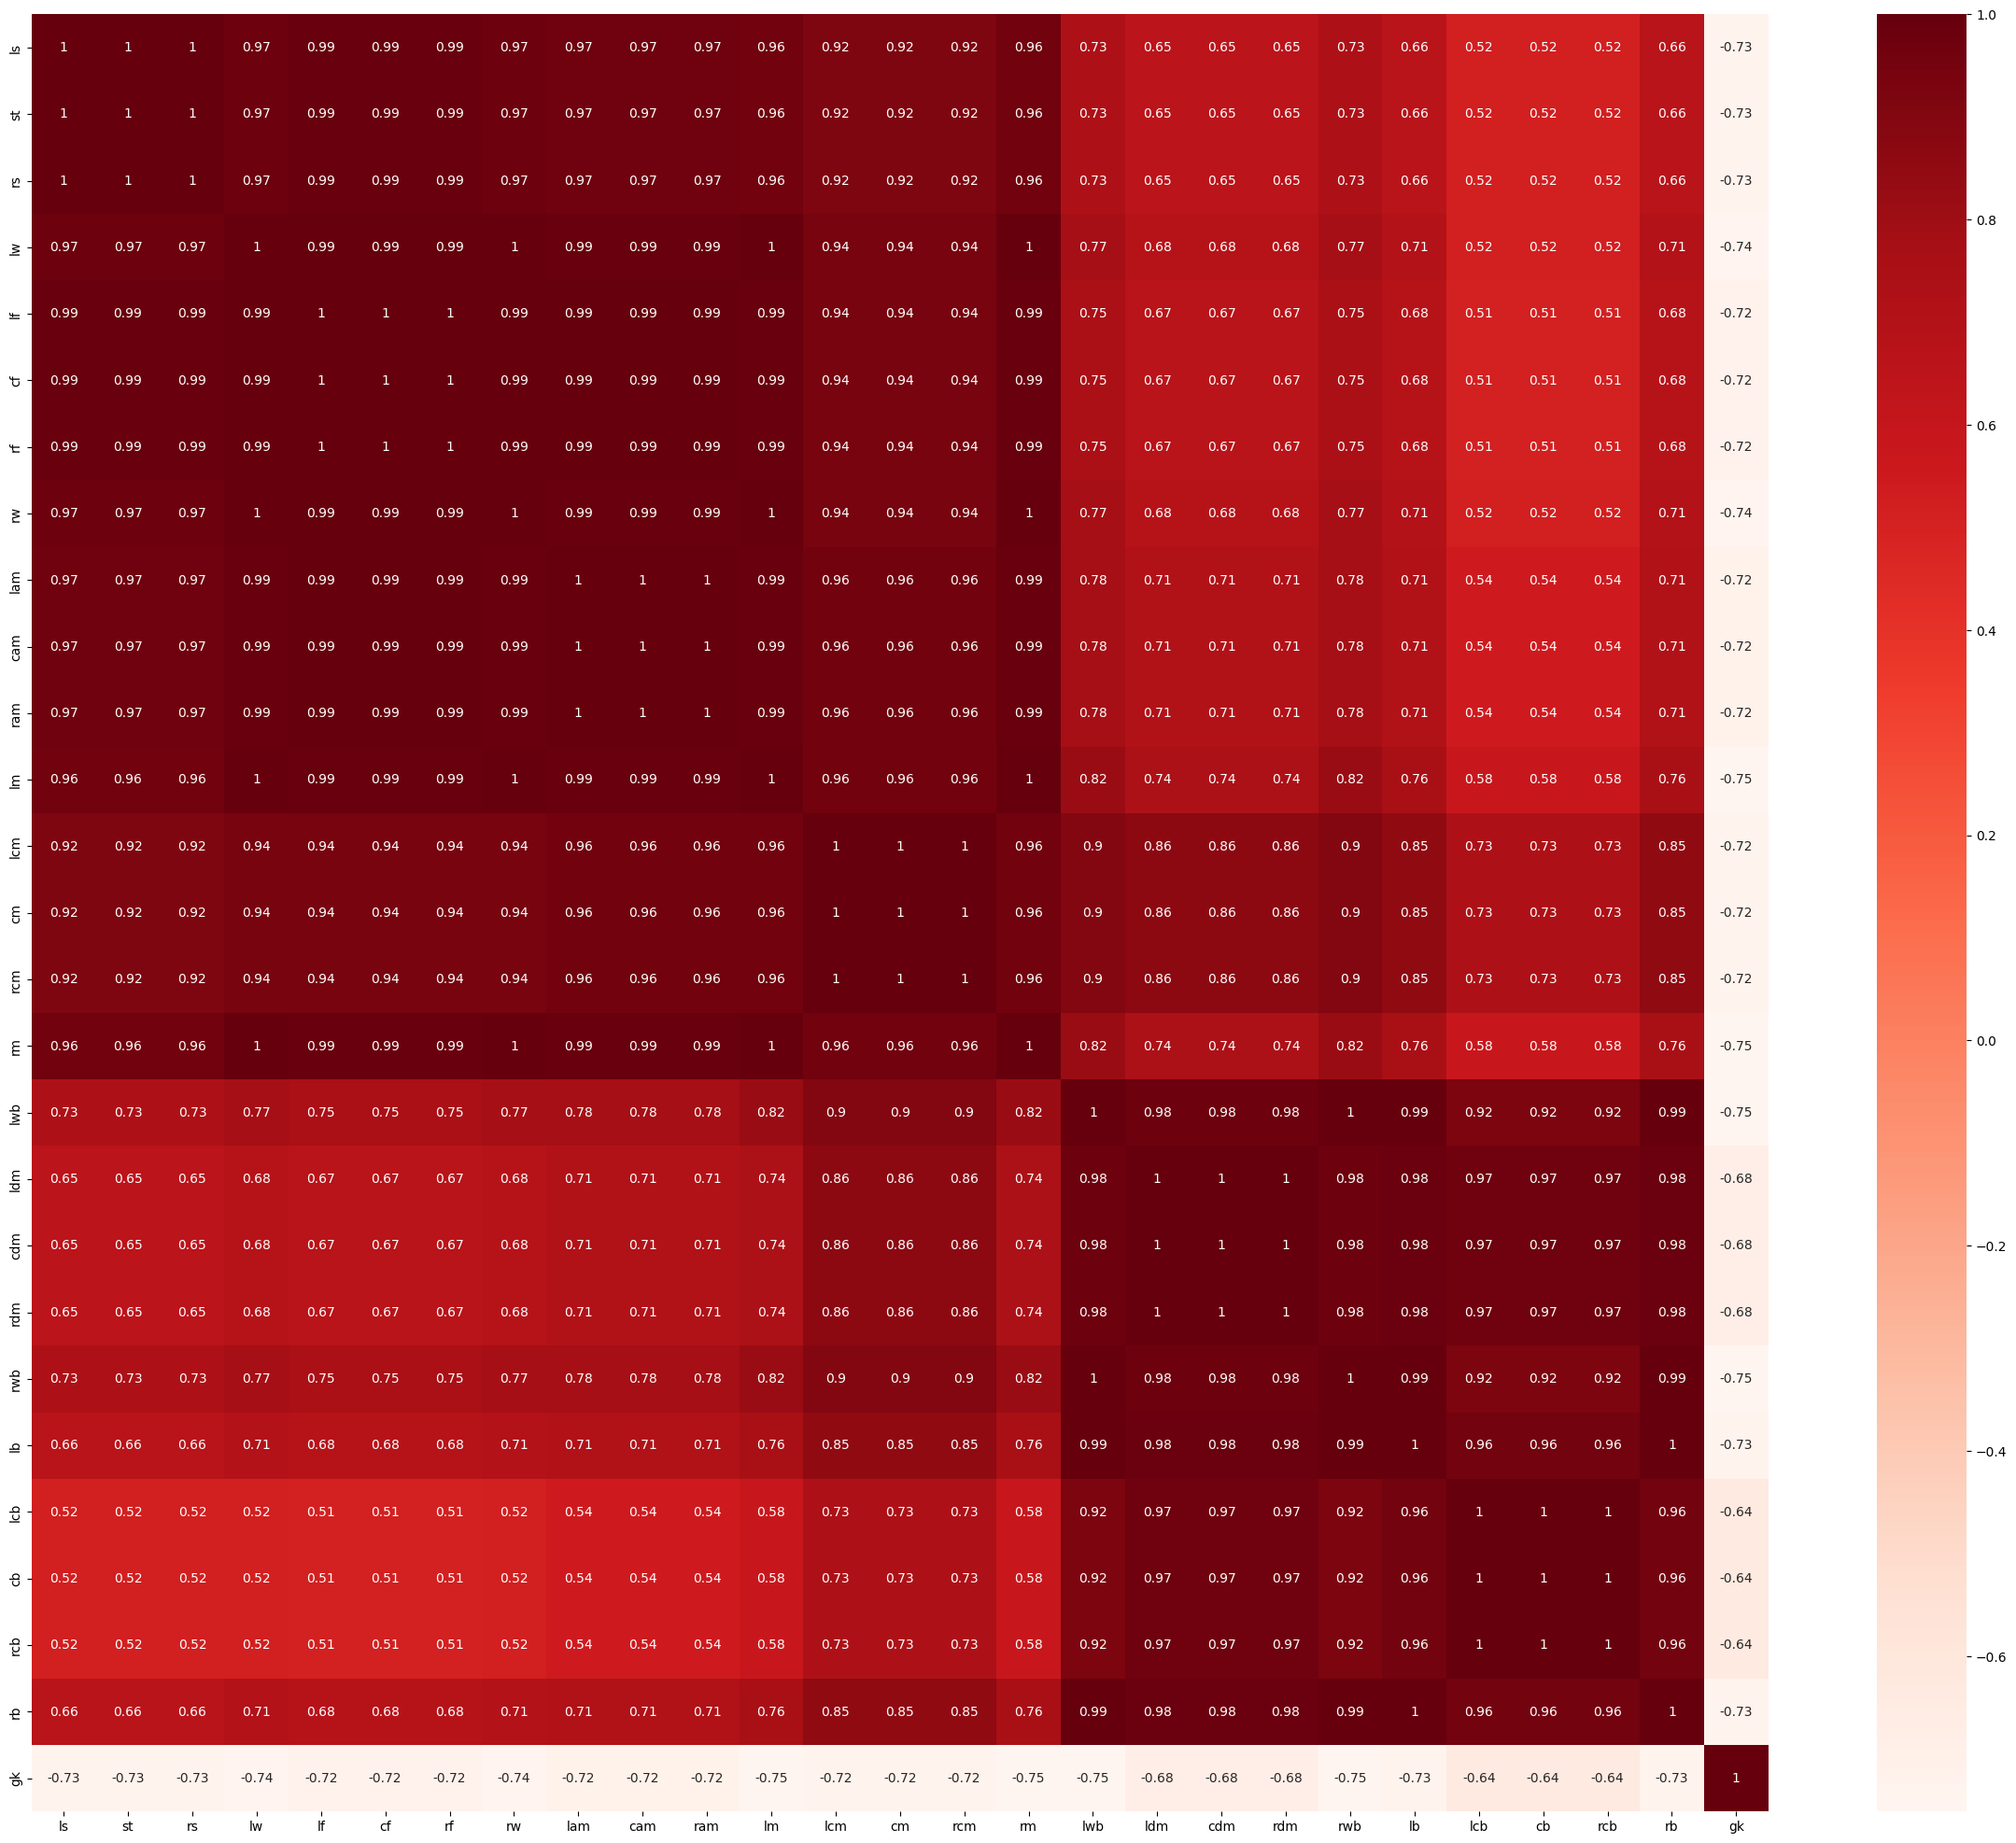

In [1804]:
plt.figure(figsize=(30, 25))
sns.heatmap(players_numeric_only[position_values_columns].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [1805]:
correlation_matrix = players_numeric_only[position_values_columns].corr()

perfectly_correlated_positions = np.where(np.abs(correlation_matrix.values) == 1)

perfectly_correlated_pairs = list(zip(correlation_matrix.index[perfectly_correlated_positions[0]],
                                       correlation_matrix.columns[perfectly_correlated_positions[1]]))

unique_correlated_pairs = set(tuple(sorted(pair)) for pair in perfectly_correlated_pairs)
unique_correlated_pairs = {pair for pair in unique_correlated_pairs if pair[0] != pair[1]}


print("There are "+str(len(unique_correlated_pairs))+" perfectly correlated columns:")
for pair in unique_correlated_pairs:
    print(pair)

There are 22 perfectly correlated columns:
('cf', 'rf')
('lf', 'rf')
('cm', 'lcm')
('ldm', 'rdm')
('cam', 'lam')
('cb', 'lcb')
('cdm', 'rdm')
('lw', 'rw')
('lam', 'ram')
('cdm', 'ldm')
('rs', 'st')
('cb', 'rcb')
('lcm', 'rcm')
('cf', 'lf')
('lcb', 'rcb')
('cm', 'rcm')
('lwb', 'rwb')
('cam', 'ram')
('ls', 'st')
('ls', 'rs')
('lb', 'rb')
('lm', 'rm')


In [1806]:
goal_keeping_columns = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

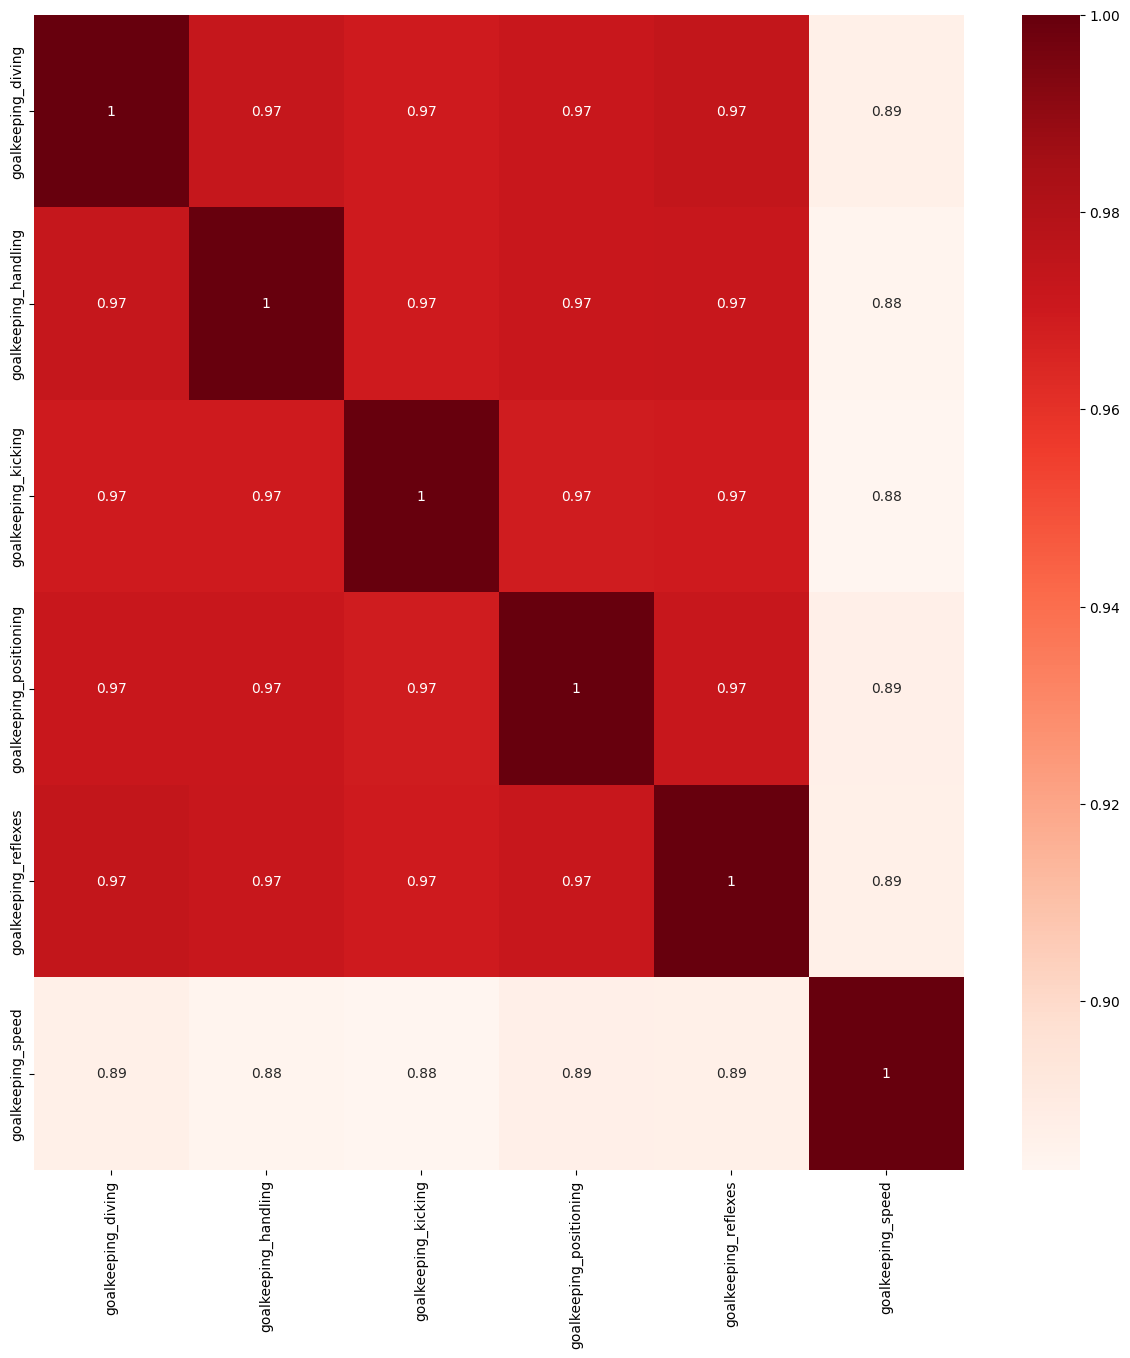

In [1807]:
plt.figure(figsize=(15, 15))
sns.heatmap(players_numeric_only[goal_keeping_columns].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [1808]:
defending_columns = ['defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle']   

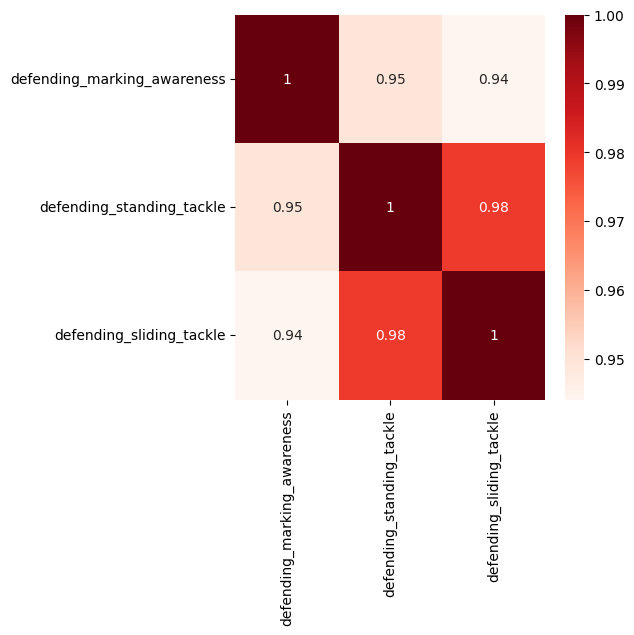

In [1809]:
plt.figure(figsize=(5, 5))
sns.heatmap(players_numeric_only[defending_columns].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [1810]:
mentality_columns = ['mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure']   

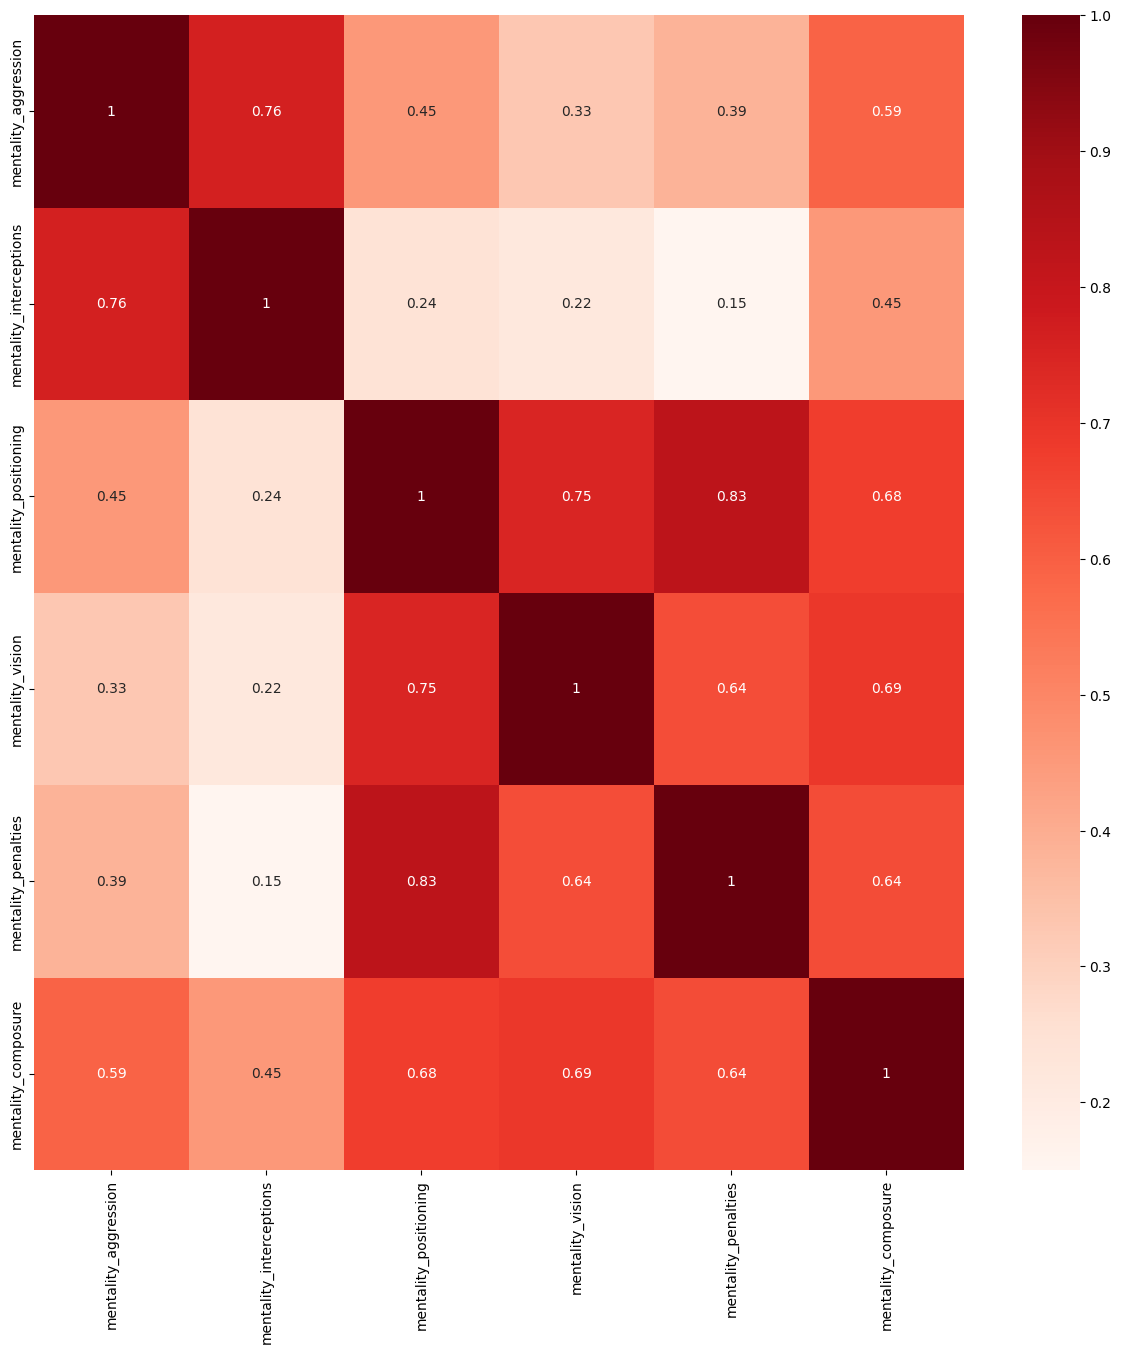

In [1811]:
plt.figure(figsize=(15, 15))
sns.heatmap(players_numeric_only[mentality_columns].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [1812]:
attacking_columns = ['attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys']   

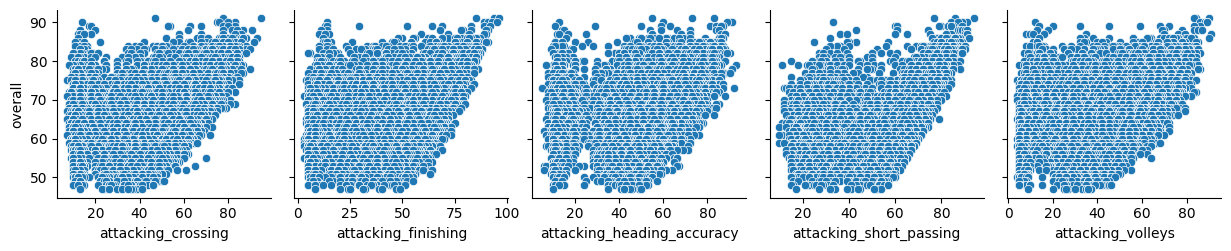

In [1813]:
sns.pairplot(players_numeric_only, x_vars=attacking_columns, y_vars='overall', kind='scatter')


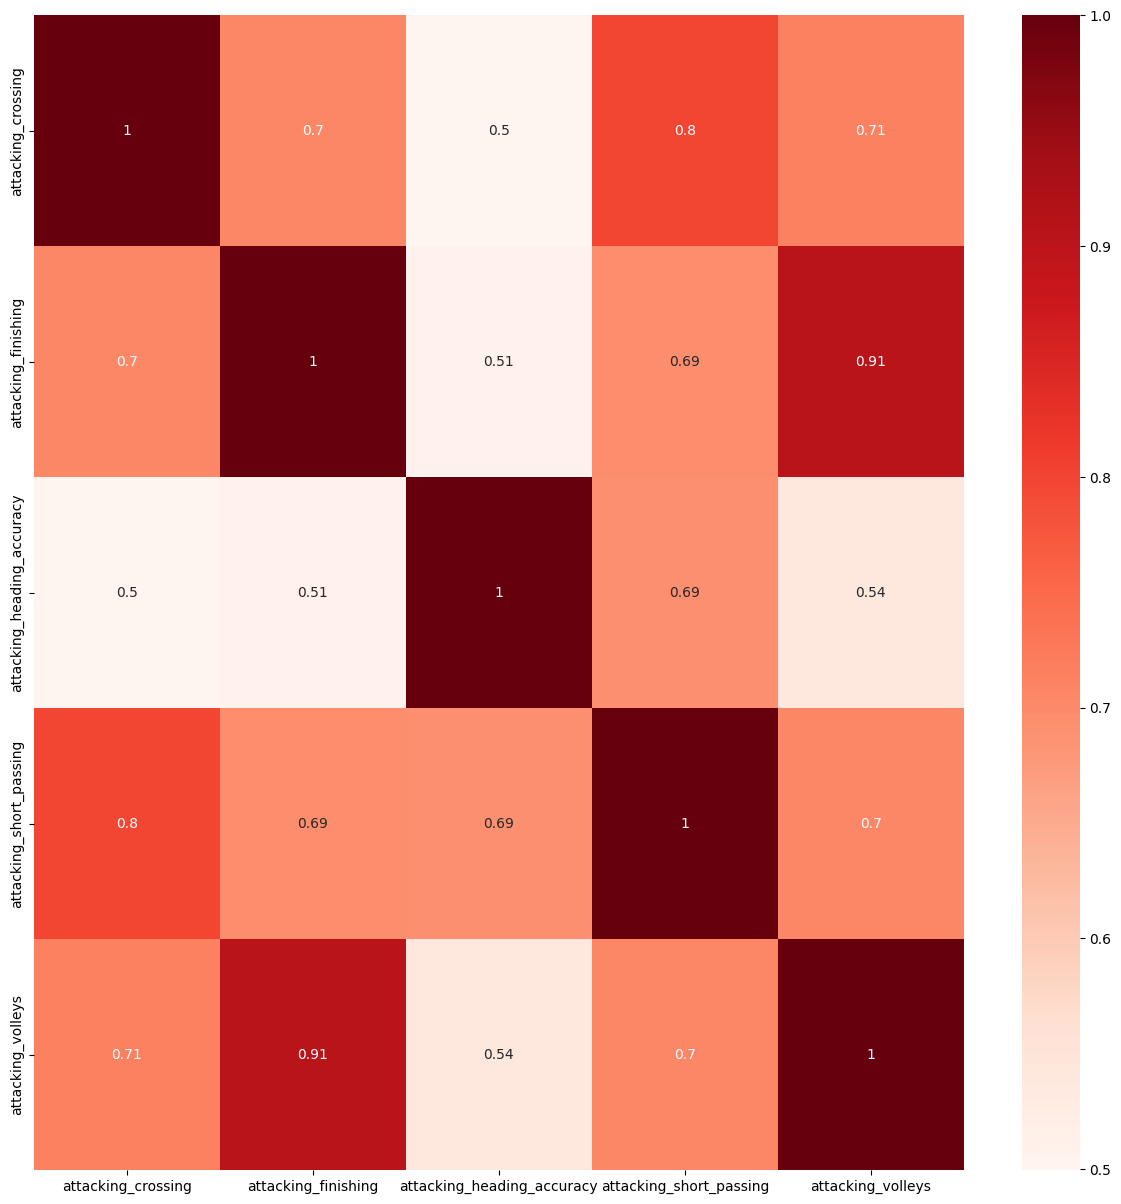

In [1814]:
plt.figure(figsize=(15, 15))
sns.heatmap(players_numeric_only[attacking_columns].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

<Axes: title={'center': 'overall'}, xlabel='age'>

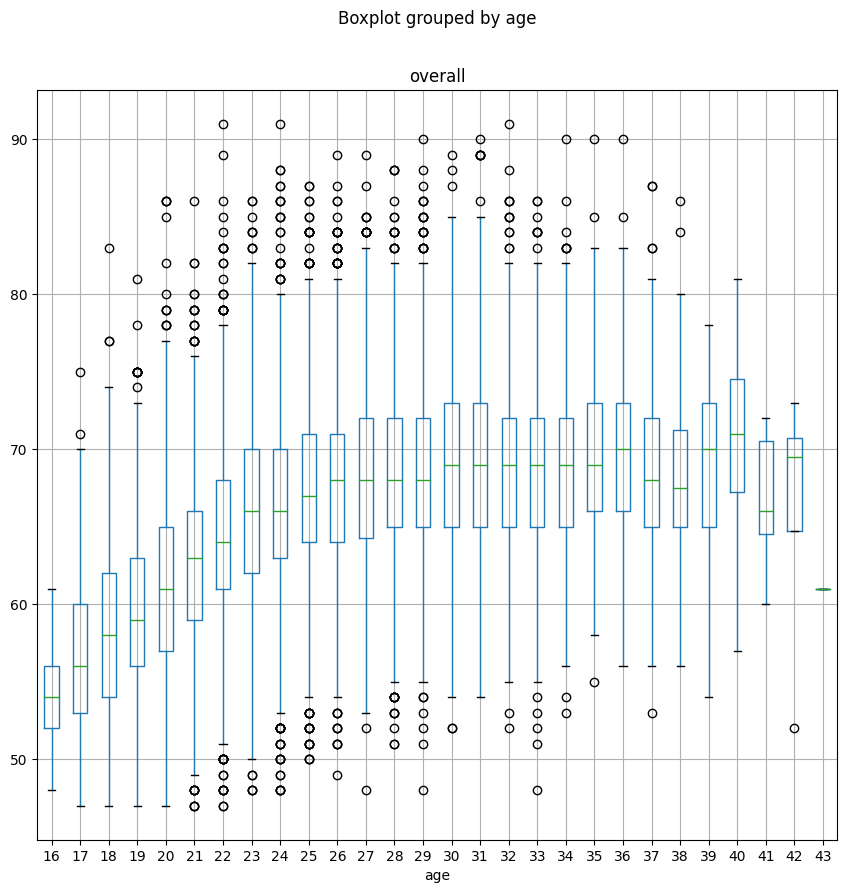

In [1815]:
players_numeric_only.boxplot(column='overall', by='age', figsize=(10, 10), vert=True)

<Axes: xlabel='overall', ylabel='Count'>

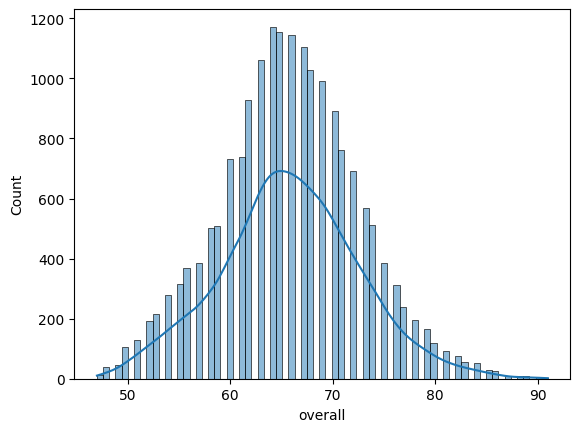

In [1816]:
sns.histplot(players_numeric_only['overall'], kde=True)


In [1817]:
csv_file_path = "Fifa24PLayers_beforefss.csv"
# Export the DataFrame to CSV
players_numeric_only.to_csv(csv_file_path, index=False)

In [1818]:
players_numeric_only

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,91,94,181500000.0,230000.0,24,182,75,73.0,16.0,1.0,1,7.0,1909.0,2024.0,18,1,4,5,5,9,349400000.0,97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,15.0,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,91,94,185000000.0,340000.0,22,195,94,10.0,13.0,1.0,1,9.0,448.0,2027.0,36,0,3,3,5,9,356100000.0,89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,15.0,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,91,91,103000000.0,350000.0,32,181,75,10.0,13.0,1.0,2,17.0,2945.0,2025.0,7,1,5,4,5,9,190600000.0,72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,15.0,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,90,90,41000000.0,23000.0,36,169,67,112893.0,39.0,1.0,3,10.0,68.0,2025.0,52,0,4,4,5,9,61500000.0,80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,15.0,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,90,90,51000000.0,95000.0,35,185,81,607.0,350.0,1.0,3,9.0,83.0,2026.0,18,1,4,4,5,4,81600000.0,79.0,88.0,83.0,87.0,39.0,78.0,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90.0,43,24,18,13,11,5,5,7,15.0,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18345,47,57,100000.0,500.0,20,176,76,114168.0,2149.0,1.0,7,44.0,403.0,2024.0,159,0,3,2,1,4,155000.0,60.0,25.0,25.0,28.0,47.0,61.0,23,20,42,27,27,20,23,26,20,25,63,57,43,40,70,39,62,56,68,20,47,45,20,28,34,39.0,51,46,47,15,7,14,6,8,15.0,33,33,33,29,29,29,29,29,28,28,28,31,29,29,29,31,41,39,39,39,41,43,47,47,47,43,13,1,1
18346,47,55,100000.0,1000.0,21,183,74,114628.0,2012.0,1.0,7,5.0,56.0,2028.0,155,1,3,2,1,5,175000.0,55.0,28.0,31.0,33.0,51.0,47.0,26,25,45,32,30,26,32,26,25,31,56,55,46,45,59,36,36,56,44,23,46,50,28,38,38,46.0,53,52,48,8,13,9,6,7,15.0,35,35,35,34,34,34,34,34,33,33,33,35,35,35,35,35,44,43,43,43,44,46,47,47,47,46,13,1,1
18347,47,55,100000.0,2000.0,19,184,65,111724.0,2012.0,1.0,1,43.0,264.0,2024.0,155,1,2,2,1,4,175000.0,68.0,46.0,38.0,46.0,16.0,45.0,32,49,41,44,37,42,31,34,31,44,70,66,57,49,69,44,40,54,46,41,34,12,43,42,61,40.0,11,13,19,12,6,7,10,8,15.0,4